Setup and Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# --- Define file paths ---
# Use raw strings (r'...') to handle Windows paths correctly
DATA_PATH = r'C:\Studies\COLLEGE SUBJECTS\Machine Learning\FA 2 updated\data\listings.csv'

CLEANED_DATA_PATH = r'C:\Studies\COLLEGE SUBJECTS\Machine Learning\FA 2 updated\data\listings_cleaned.csv'
VISUALS_PATH = r'C:\Studies\COLLEGE SUBJECTS\Machine Learning\FA 2 updated\visuals\1'


# Create the visuals directory if it doesn't exist
os.makedirs(VISUALS_PATH, exist_ok=True)

print("Step 1 Complete: Libraries imported and paths defined.")
print(f"Data will be loaded from: {DATA_PATH}")
print(f"Visuals will be saved to: {VISUALS_PATH}")

Step 1 Complete: Libraries imported and paths defined.
Data will be loaded from: C:\Studies\Machine Learning\FA 2 updated\data\listings.csv
Visuals will be saved to: C:\Studies\Machine Learning\FA 2 updated\visuals\1


Load and Inspect Data

In [3]:
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Successfully loaded data from {DATA_PATH}")

    # Print the shape
    print("\n--- Dataset Shape ---")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

    # Display the first 5 rows
    print("\n--- Dataset Head ---")
    display(df.head())

    # Display the full summary
    print("\n--- Dataset Info (Column Types and Nulls) ---")
    df.info()

except FileNotFoundError:
    print(f"ERROR: File not found at {DATA_PATH}")
    print("Please ensure the file exists and the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded data from C:\Studies\Machine Learning\FA 2 updated\data\listings.csv

--- Dataset Shape ---
Rows: 18187, Columns: 79

--- Dataset Head ---


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20250610032053,2025-06-17,city scrape,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.02
1,15253,https://www.airbnb.com/rooms/15253,20250610032053,2025-06-17,city scrape,Unique Designer Rooftop Apartment in City Loca...,You will be staying in a unique apartment on t...,The location is really central and there is nu...,https://a0.muscache.com/pictures/a41641fb-0e5a...,59850,...,4.75,4.76,4.56,PID-STRA-24061-7,t,1,0,1,0,3.81
2,44545,https://www.airbnb.com/rooms/44545,20250610032053,2025-06-17,city scrape,Sunny Darlinghurst Warehouse Apartment,Sunny warehouse/loft apartment in the heart of...,Darlinghurst is home to some of Sydney's best ...,https://a0.muscache.com/pictures/a88d8e14-4f63...,112237,...,4.96,4.93,4.79,PID-STRA-74219,f,1,1,0,0,0.46
3,58506,https://www.airbnb.com/rooms/58506,20250610032053,2025-06-17,city scrape,"Studio Yindi @ Mosman, Sydney","An open plan apartment, adjacent to a spacious...","Mosman is a smart, middle to upper class subur...",https://a0.muscache.com/pictures/23497720/d30f...,279955,...,4.92,4.76,4.73,PID-STRA-2810,f,1,1,0,0,2.54
4,68999,https://www.airbnb.com/rooms/68999,20250610032053,2025-06-17,city scrape,A little bit of Sydney - Australia,"Hello Everyone,<br /><br />We have a quiet are...",NaN,https://a0.muscache.com/pictures/5264473/5bec1...,333581,...,4.99,4.85,4.93,PID-STRA-9081,f,1,0,1,0,0.70



--- Dataset Info (Column Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18187 entries, 0 to 18186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18187 non-null  int64  
 1   listing_url                                   18187 non-null  object 
 2   scrape_id                                     18187 non-null  int64  
 3   last_scraped                                  18187 non-null  object 
 4   source                                        18187 non-null  object 
 5   name                                          18187 non-null  object 
 6   description                                   17894 non-null  object 
 7   neighborhood_overview                         8234 non-null   object 
 8   picture_url                                   18187 non-null  object 
 9   host_id       

Initial Cleaning and Column Dropping

In [4]:
print(f"Original shape: {df.shape}")

# 1. Drop duplicate rows
original_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Dropped {original_rows - df.shape[0]} duplicate rows.")

Original shape: (18187, 79)
Dropped 0 duplicate rows.


In [5]:
# 2. Drop columns with > 90% missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
cols_to_drop_high_null = missing_percentage[missing_percentage > 90].index
df = df.drop(columns=cols_to_drop_high_null)
print(f"Dropped high-null columns: {list(cols_to_drop_high_null)}")

Dropped high-null columns: ['neighbourhood_group_cleansed', 'calendar_updated']


In [6]:
cols_to_drop_irrelevant = [
    # Irrelevant IDs/URLs
    'id', 'listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url', 
    'host_thumbnail_url', 'host_picture_url',
    
    # Redundant/Static
    'source', 'last_scraped', 'calendar_last_scraped', 'host_name', 
    'host_location', 'host_neighbourhood', 'neighbourhood',
    
    # Redundant Night Features
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
    'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
    
    # Redundant Availability Features
    'availability_30', 'availability_60', 'availability_90', 'availability_eoy',
    
    # Redundant Review Features
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d'
]

In [7]:
# Ensure we only drop columns that actually exist
existing_cols_to_drop = [col for col in cols_to_drop_irrelevant if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)

print(f"Dropped {len(existing_cols_to_drop)} irrelevant/redundant columns.")
print(f"New shape: {df.shape}")

Dropped 30 irrelevant/redundant columns.
New shape: (18187, 47)


Feature Engineering and Type Conversion

In [8]:
# 1. Price (Target 1)
# Remove '$' and ',' and convert to float
df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

In [9]:
# 2. Superhost (Target 2) and 3. Booleans
# Convert 't'/'f' columns to 1/0 integers
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].map({'t': 1, 'f': 0})

In [10]:
# 4. Percentages
# Convert '95%' to 0.95
perc_cols = ['host_response_rate', 'host_acceptance_rate']
for col in perc_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float) / 100.0

In [11]:
# 5. Date Feature
if 'host_since' in df.columns:
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['host_duration_days'] = (pd.Timestamp.now() - df['host_since']).dt.days
    # Drop original date columns
    df = df.drop(columns=['host_since', 'first_review', 'last_review'], errors='ignore')

In [12]:
# 6. Bathroom Parsing
if 'bathrooms_text' in df.columns:
    # Extract numeric part (e.g., '1.5', '2')
    df['bathrooms_numeric'] = df['bathrooms_text'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
    # Check for 'shared'
    df['is_shared_bath'] = df['bathrooms_text'].astype(str).str.contains('shared').astype(int)
    # Drop original columns
    df = df.drop(columns=['bathrooms_text', 'bathrooms'], errors='ignore')

In [13]:
# 7. Amenities Parsing
if 'amenities' in df.columns:
    # Count the number of amenities listed
    df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
    df = df.drop(columns=['amenities'])

In [14]:
# 8. Text Feature Engineering
sia = SentimentIntensityAnalyzer()

# Sentiment Analysis
# Handle NaNs by filling with an empty string before analysis
df['description_sentiment'] = df['description'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])
df['neigh_overview_sentiment'] = df['neighborhood_overview'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

In [15]:
# Keyword Counting
keywords = ['fast wifi', 'newly renovated', 'ocean view', 'luxury', 'quiet', 'central', 'spacious']
df['keyword_count'] = df['description'].astype(str).str.lower().apply(lambda x: sum(keyword in x for keyword in keywords))

# Length Feature
df['description_length'] = df['description'].str.len()

In [16]:
# 9. Drop Original Text Columns
text_cols_to_drop = ['name', 'description', 'neighborhood_overview', 'host_about']
df = df.drop(columns=[col for col in text_cols_to_drop if col in df.columns])

print("Feature engineering complete.")
print("\nNew columns created:")
print(['price (numeric)', 'host_is_superhost (binary)', 'host_duration_days', 
       'bathrooms_numeric', 'is_shared_bath', 'amenities_count', 
       'description_sentiment', 'neigh_overview_sentiment', 'keyword_count', 'description_length'])
display(df.head())

Feature engineering complete.

New columns created:
['price (numeric)', 'host_is_superhost (binary)', 'host_duration_days', 'bathrooms_numeric', 'is_shared_bath', 'amenities_count', 'description_sentiment', 'neigh_overview_sentiment', 'keyword_count', 'description_length']


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,bathrooms_numeric,is_shared_bath,amenities_count,description_sentiment,neigh_overview_sentiment,keyword_count,description_length
0,NaN,NaN,NaN,0.0,1.0,1.0,"['email', 'phone']",1.0,0.0,Sydney,...,0,1.02,5888.0,1.0,1,27,0.7430,0.5994,1,150.0
1,within an hour,1.0,0.99,0.0,1.0,6.0,"['email', 'phone']",1.0,1.0,Sydney,...,0,3.81,5817.0,1.0,0,61,0.9694,0.9678,2,506.0
2,within an hour,1.0,0.86,0.0,1.0,1.0,"['email', 'phone']",1.0,1.0,Sydney,...,0,0.46,5677.0,1.0,0,39,0.9423,0.9845,0,498.0
3,within a few hours,1.0,0.92,1.0,1.0,3.0,"['email', 'phone']",1.0,1.0,Mosman,...,0,2.54,5479.0,1.0,0,50,0.6908,0.9652,1,289.0
4,within an hour,1.0,0.89,1.0,1.0,3.0,"['email', 'phone', 'work_email']",1.0,1.0,Hornsby,...,0,0.70,5421.0,2.5,1,58,0.0000,0.0000,1,106.0


Handling Missing Values

In [17]:
print("--- Step 5: Handling Missing Values ---")
print(f"Shape before dropping NaNs: {df.shape}")

# 1. Targets: Drop rows where targets are unusable
df = df.dropna(subset=['price', 'host_is_superhost'])
df = df[df['price'] > 0] # Remove $0 or invalid listings
print(f"Shape after dropping target NaNs and $0 prices: {df.shape}")

--- Step 5: Handling Missing Values ---
Shape before dropping NaNs: (18187, 45)
Shape after dropping target NaNs and $0 prices: (15242, 45)


In [18]:
# 2. Numerical Imputation (Median)
print("\nImputing numerical columns with median...")
review_cols = [col for col in df.columns if 'review_scores_' in col]
median_impute_cols = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 
                        'beds', 'bathrooms_numeric', 'host_duration_days']

# Filter list to only include columns that exist
median_impute_cols = [col for col in median_impute_cols if col in df.columns] + review_cols

for col in median_impute_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


Imputing numerical columns with median...


In [19]:
# 3. Numerical Imputation (Zero)
print("Imputing specific numerical columns with zero...")
zero_impute_cols = ['reviews_per_month', 'description_length']
zero_impute_cols = [col for col in zero_impute_cols if col in df.columns]
df[zero_impute_cols] = df[zero_impute_cols].fillna(0)

Imputing specific numerical columns with zero...


In [20]:
# 4. Categorical/Binary Imputation (Mode)
print("Imputing categorical/binary columns with mode...")
# host_has_profile_pic & host_identity_verified are now binary (1/0)
# Imputing with the mode (most frequent value) is the correct strategy.
mode_impute_cols = ['host_response_time', 'host_has_profile_pic', 'host_identity_verified']
mode_impute_cols = [col for col in mode_impute_cols if col in df.columns]

for col in mode_impute_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

Imputing categorical/binary columns with mode...


In [21]:
# --- Final Check ---
print("\n--- Missing Values Check After Imputation ---")
remaining_nulls = df.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]

if remaining_nulls.empty:
    print("No remaining missing values. Imputation complete.")
else:
    print("WARNING: Remaining missing values found:")
    print(remaining_nulls)

print(f"\nFinal shape after imputation: {df.shape}")


--- Missing Values Check After Imputation ---
host_listings_count             2
host_total_listings_count       2
host_verifications              2
has_availability               82
license                      1234
dtype: int64

Final shape after imputation: (15242, 45)


Outlier Handling

--- Step 6: Outlier Handling ---
Shape before outlier removal: (15242, 45)


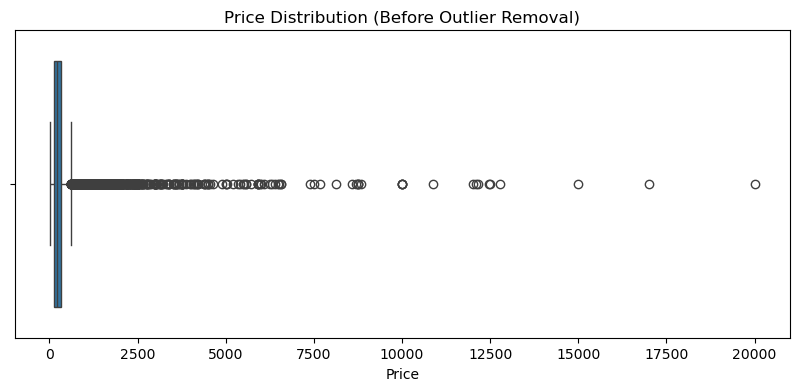


99th percentile for price: $2,447.95
Removed 153 listings with price > 99th percentile.


In [22]:
print("--- Step 6: Outlier Handling ---")
print(f"Shape before outlier removal: {df.shape}")

# --- 1. Price Outlier Handling ---

# Visualize price outliers with a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Price Distribution (Before Outlier Removal)')
plt.xlabel('Price')
plt.savefig(os.path.join(VISUALS_PATH, 'price_outlier_boxplot.png'), bbox_inches='tight')
plt.show()

# Calculate the 99th percentile for price
price_quantile_99 = df['price'].quantile(0.99)
print(f"\n99th percentile for price: ${price_quantile_99:,.2f}")

# Filter the DataFrame, keeping only listings below the 99th percentile
original_rows = df.shape[0]
df = df[df['price'] < price_quantile_99]
print(f"Removed {original_rows - df.shape[0]} listings with price > 99th percentile.")

Removed 0 listings with minimum_nights > 365.

Final shape after outlier removal: (15089, 45)


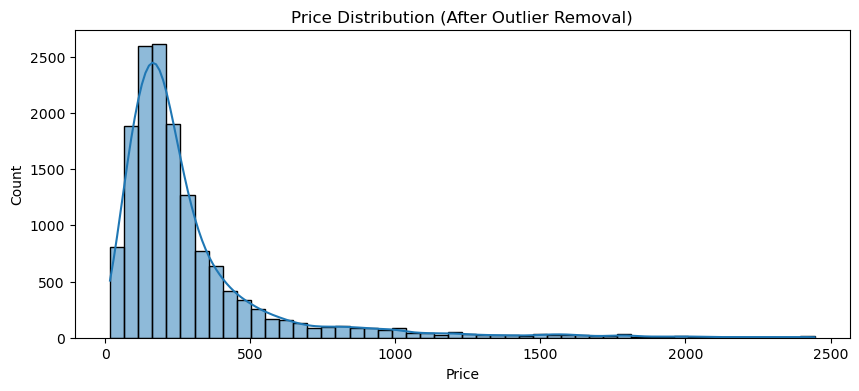

In [23]:
# --- 2. Minimum Nights Outlier Handling ---

# Filter for realistic stays (1 year or less)
original_rows = df.shape[0]
df = df[df['minimum_nights'] <= 365]
print(f"Removed {original_rows - df.shape[0]} listings with minimum_nights > 365.")

# --- Final Check ---
print(f"\nFinal shape after outlier removal: {df.shape}")

# Show the new price distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (After Outlier Removal)')
plt.xlabel('Price')
plt.savefig(os.path.join(VISUALS_PATH, 'price_distribution_after_outliers.png'), bbox_inches='tight')
plt.show()

EDA and Visualization

In [24]:
print("--- Step 7: Exploratory Data Analysis and Visualization ---")

# --- 1. Descriptive Statistics ---
print("\n--- Descriptive Statistics for Cleaned Numeric Data ---")
# Set option to see all columns
pd.set_option('display.max_columns', None)
display(df.describe())

--- Step 7: Exploratory Data Analysis and Visualization ---

--- Descriptive Statistics for Cleaned Numeric Data ---


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,bathrooms_numeric,is_shared_bath,amenities_count,description_sentiment,neigh_overview_sentiment,keyword_count,description_length
count,15089.000000,15089.000000,15089.000000,15087.000000,15087.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.00000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000,15089.000000
mean,0.964220,0.868828,0.327855,31.922052,47.264532,0.968056,0.953145,-33.850799,151.175162,3.939824,1.796607,2.256346,295.690437,16.04997,454.586851,194.617138,39.855126,4.735574,4.766254,4.692497,4.826786,4.848920,4.832442,4.645303,0.298562,18.786865,15.428392,3.304328,0.024256,1.257877,2843.698058,1.458148,0.111870,37.341507,0.760185,0.300049,0.529922,400.482736
std,0.142783,0.231901,0.469447,108.431848,130.068253,0.175856,0.211336,0.090771,0.114667,2.432293,1.194410,1.702730,302.578134,33.86451,394.309197,116.696135,73.236223,0.391493,0.383096,0.426492,0.352558,0.344997,0.302125,0.408880,0.457642,37.329507,34.205366,16.984223,0.461044,1.466096,1358.623380,0.761263,0.315216,16.400939,0.297437,0.410636,0.672850,157.220811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.095680,150.630490,1.000000,0.000000,0.000000,17.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,1.000000,-0.959500,-0.822500,0.000000,0.000000
25%,1.000000,0.870000,0.000000,1.000000,2.000000,1.000000,1.000000,-33.896930,151.135150,2.000000,1.000000,1.000000,137.000000,1.00000,90.000000,88.000000,2.000000,4.690000,4.740000,4.630000,4.820000,4.860000,4.810000,4.580000,0.000000,1.000000,1.000000,0.000000,0.000000,0.150000,1863.000000,1.000000,0.000000,27.000000,0.709600,0.000000,0.000000,315.000000
50%,1.000000,0.970000,0.000000,3.000000,4.000000,1.000000,1.000000,-33.874756,151.204800,4.000000,1.000000,2.000000,203.000000,2.00000,365.000000,183.000000,12.000000,4.830000,4.860000,4.800000,4.920000,4.940000,4.910000,4.730000,0.000000,2.000000,1.000000,0.000000,0.000000,0.810000,3075.000000,1.000000,0.000000,38.000000,0.891000,0.000000,0.000000,459.000000
75%,1.000000,1.000000,1.000000,22.000000,32.000000,1.000000,1.000000,-33.800940,151.250940,5.000000,2.000000,3.000000,321.000000,5.00000,720.000000,304.000000,45.000000,4.940000,4.950000,4.930000,5.000000,5.000000,4.980000,4.850000,1.000000,18.000000,11.000000,1.000000,0.000000,1.890000,3891.000000,2.000000,0.000000,49.000000,0.952400,0.778300,1.000000,501.000000
max,1.000000,1.000000,1.000000,912.000000,939.000000,1.000000,1.000000,-33.383640,151.340140,16.000000,13.000000,50.000000,2445.000000,365.00000,1126.000000,365.000000,1227.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,195.000000,195.000000,155.000000,12.000000,17.470000,5909.000000,21.000000,1.000000,111.000000,0.995700,0.997300,4.000000,1000.000000


In [25]:
# --- 2. Price Distribution ---
print("\nGenerating and saving plots...")

# Create the log_price column for normalized visualization
df['log_price'] = np.log1p(df['price'])


Generating and saving plots...


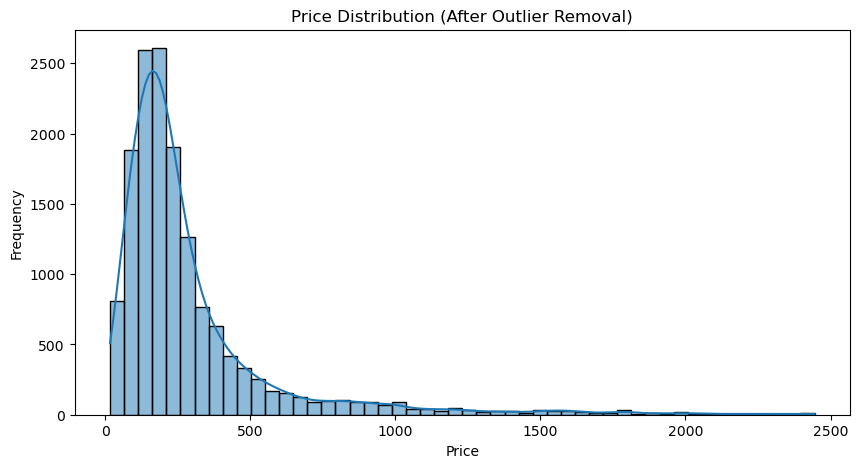

In [26]:
# Plot 1: Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig(os.path.join(VISUALS_PATH, 'price_distribution.png'), bbox_inches='tight')
plt.show()

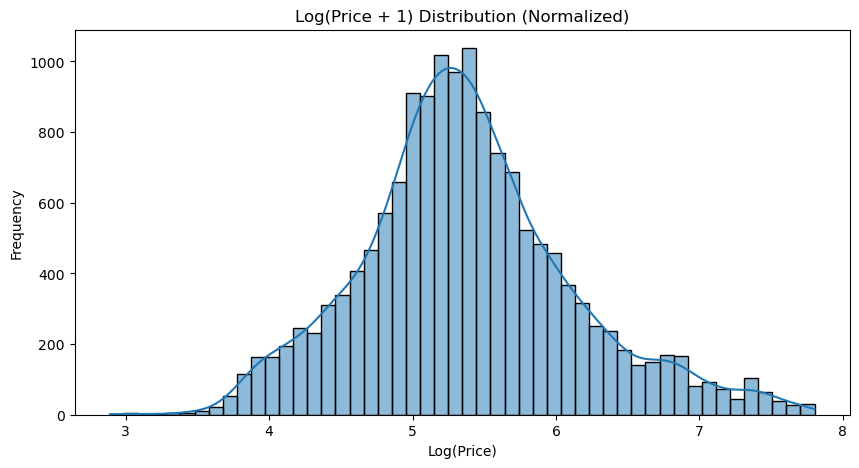

In [27]:
# Plot 2: Log(Price) Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Log(Price + 1) Distribution (Normalized)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.savefig(os.path.join(VISUALS_PATH, 'log_price_distribution.png'), bbox_inches='tight')
plt.show()

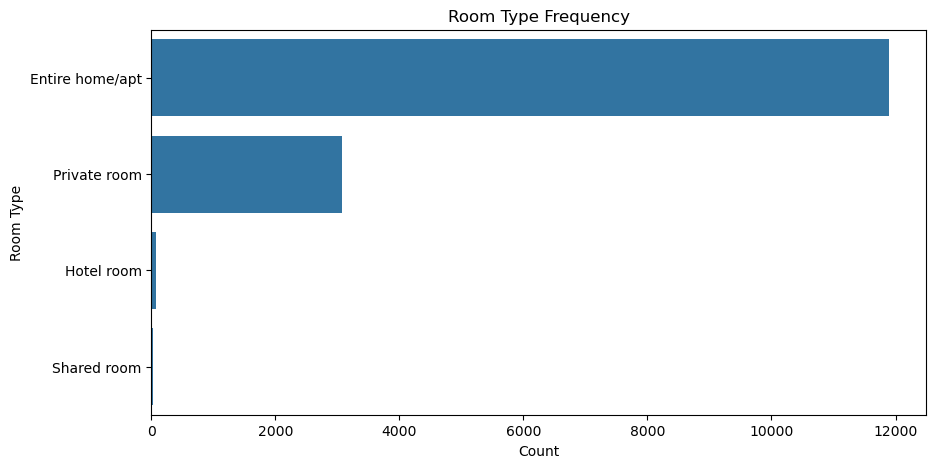

In [28]:
# --- 3. Room Type Frequency ---
# Plot 3: Room Type Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Frequency')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.savefig(os.path.join(VISUALS_PATH, 'room_type_frequency.png'), bbox_inches='tight')
plt.show()

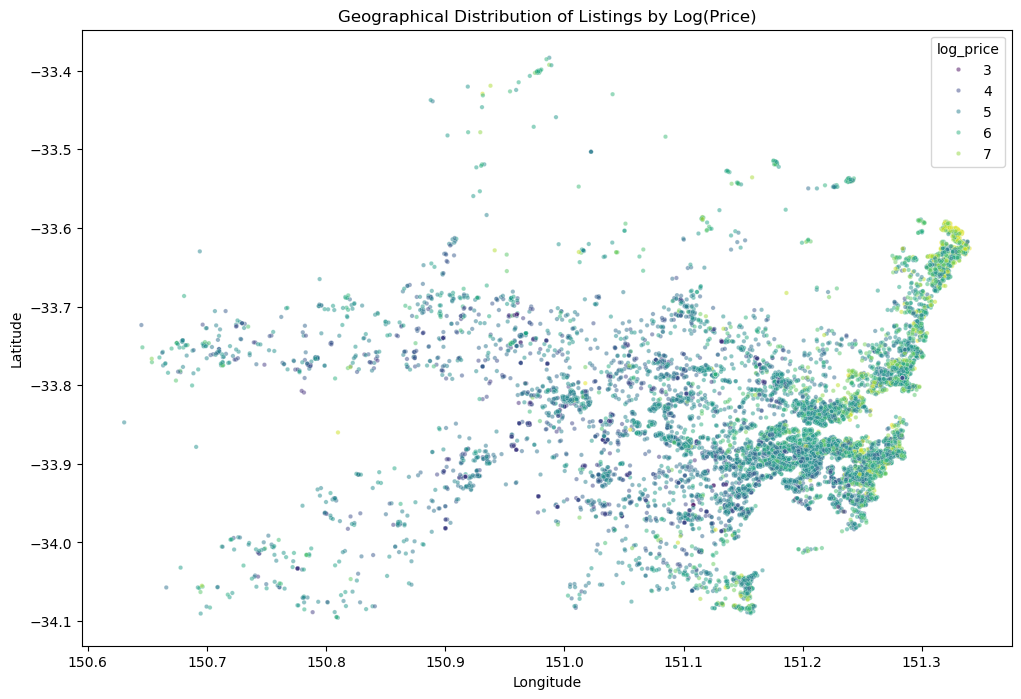

In [29]:
# --- 4. Geographical Plots ---
# Plot 4: Geographical Price Map
plt.figure(figsize=(12, 8))

# FIX: Changed c='log_price' to hue='log_price'
# FIX: Changed cmap='viridis' to palette='viridis'
sns.scatterplot(data=df, x='longitude', y='latitude', hue='log_price', 
                palette='viridis', s=10, alpha=0.5)

plt.title('Geographical Distribution of Listings by Log(Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# We can remove plt.legend(), as seaborn will add a perfect legend automatically.
plt.savefig(os.path.join(VISUALS_PATH, 'geo_price_map.png'), bbox_inches='tight')
plt.show()

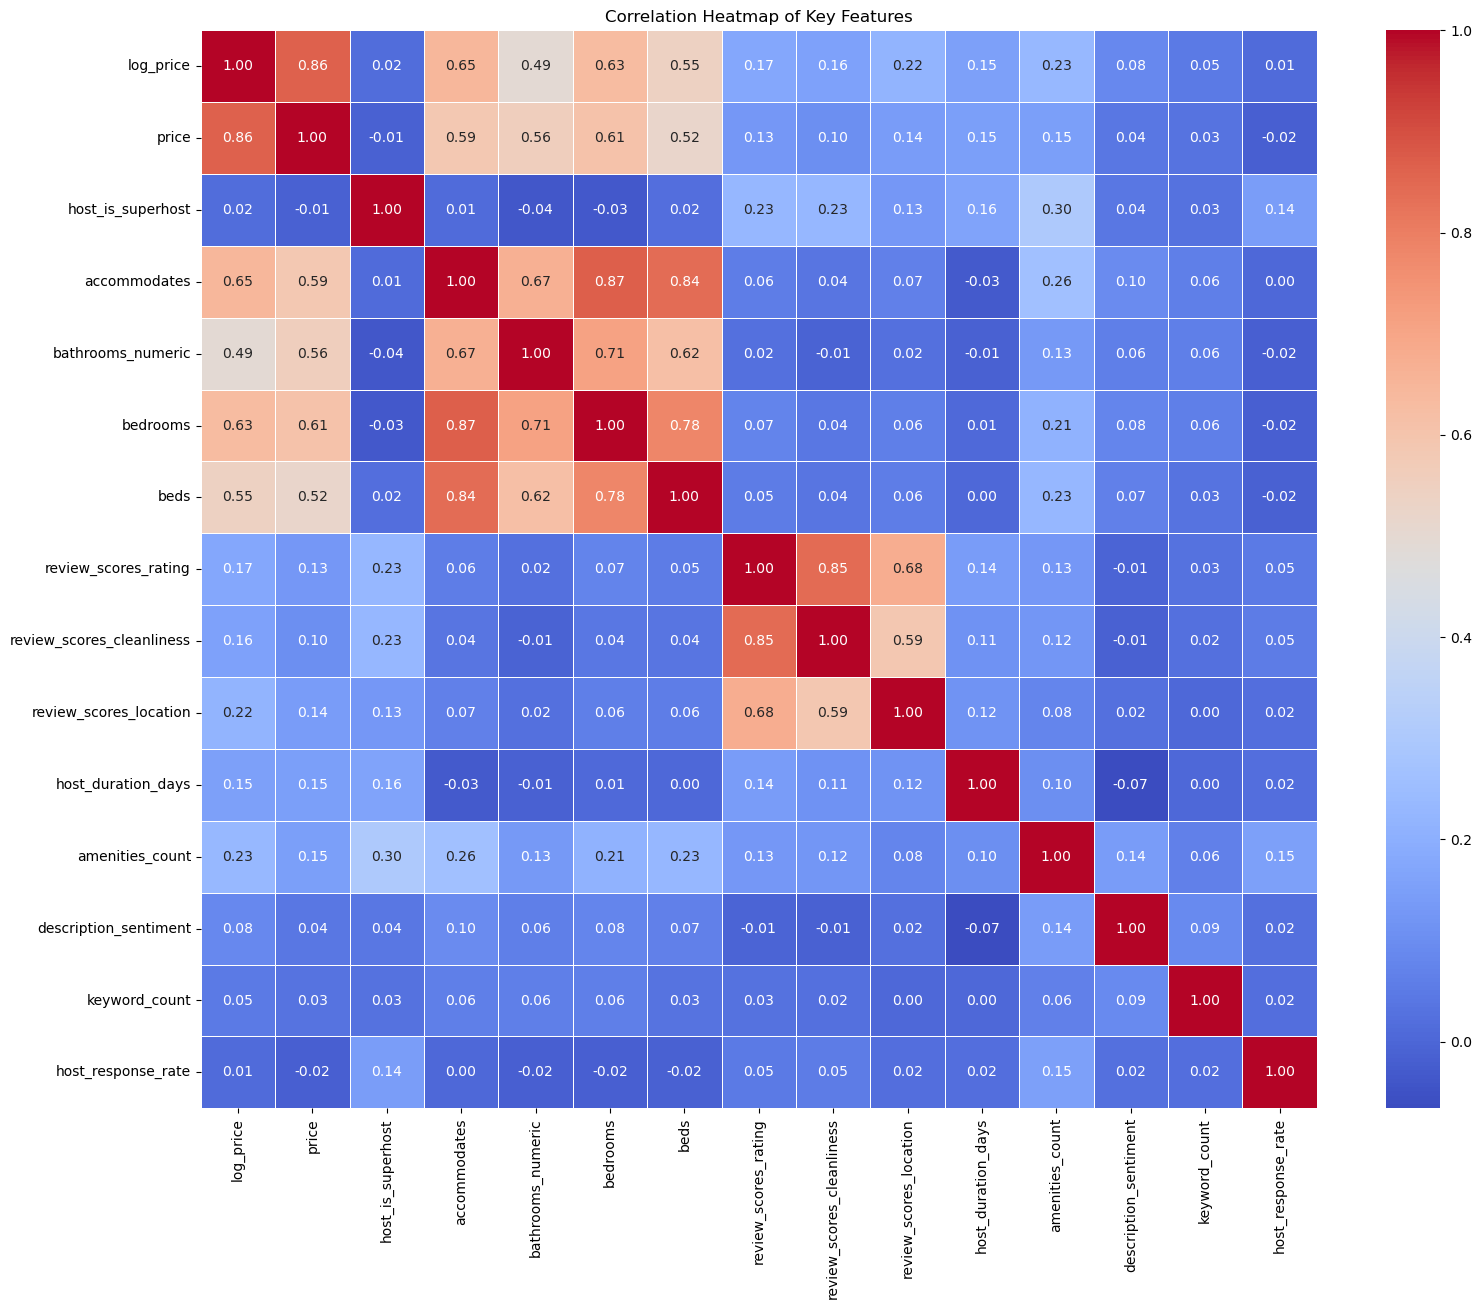

In [30]:
# --- 5. Correlation Heatmap ---
# Plot 5: Correlation Heatmap
plt.figure(figsize=(18, 14))
# Select key numeric features for the heatmap
key_features = [
    'log_price', 'price', 'host_is_superhost', 'accommodates', 'bathrooms_numeric', 
    'bedrooms', 'beds', 'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'host_duration_days', 'amenities_count', 
    'description_sentiment', 'keyword_count', 'host_response_rate'
]
# Filter to only include features that exist in the dataframe
key_features = [col for col in key_features if col in df.columns]

corr = df[key_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Key Features')
plt.savefig(os.path.join(VISUALS_PATH, 'correlation_heatmap.png'), bbox_inches='tight')
plt.show()

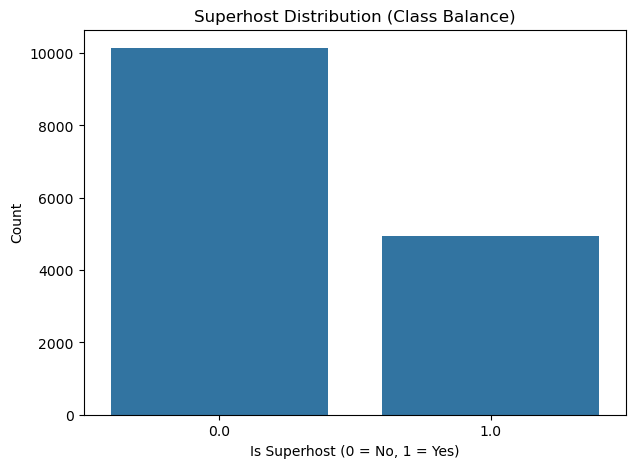

In [31]:
# --- 6. Other Required Visuals ---
# Plot 6: Superhost Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='host_is_superhost')
plt.title('Superhost Distribution (Class Balance)')
plt.xlabel('Is Superhost (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.savefig(os.path.join(VISUALS_PATH, 'superhost_distribution.png'), bbox_inches='tight')
plt.show()

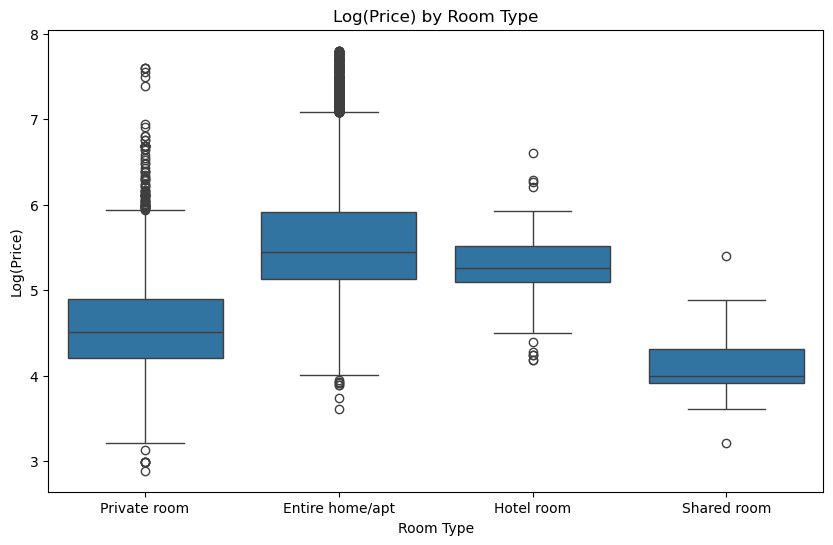

In [32]:
# Plot 7: Price vs. Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='log_price')
plt.title('Log(Price) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log(Price)')
plt.savefig(os.path.join(VISUALS_PATH, 'price_vs_room_type.png'), bbox_inches='tight')
plt.show()

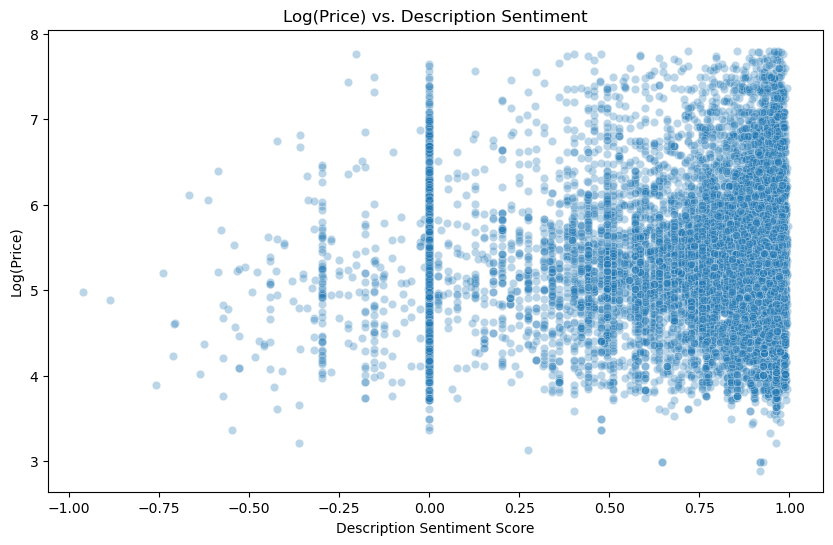

In [33]:
# Plot 8: Sentiment vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='description_sentiment', y='log_price', alpha=0.3)
plt.title('Log(Price) vs. Description Sentiment')
plt.xlabel('Description Sentiment Score')
plt.ylabel('Log(Price)')
plt.savefig(os.path.join(VISUALS_PATH, 'sentiment_vs_price.png'), bbox_inches='tight')
plt.show()

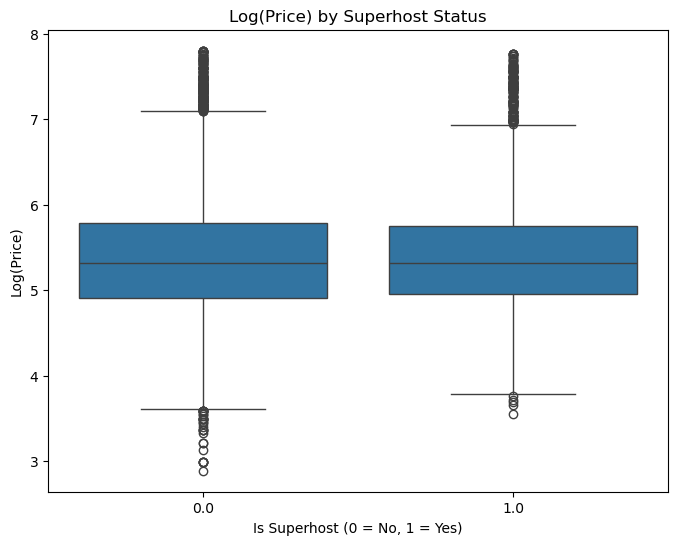

In [34]:
# Bonus Plot 9: Superhost vs. Log(Price)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='host_is_superhost', y='log_price')
plt.title('Log(Price) by Superhost Status')
plt.xlabel('Is Superhost (0 = No, 1 = Yes)')
plt.ylabel('Log(Price)')
plt.savefig(os.path.join(VISUALS_PATH, 'price_vs_superhost.png'), bbox_inches='tight')
plt.show()

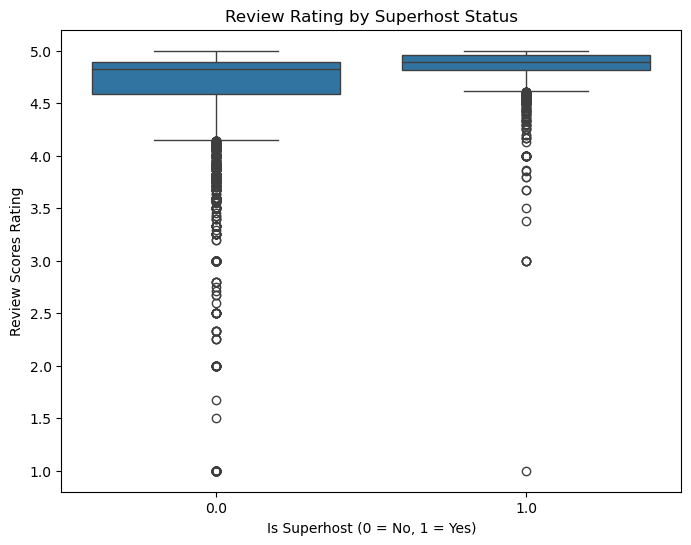


--- EDA and Visualization Complete ---
All 12 plots saved to C:\Studies\Machine Learning\FA 2 updated\visuals\1


In [35]:
# Bonus Plot 10: Superhost vs. Review Rating
# Check if 'review_scores_rating' exists before plotting
if 'review_scores_rating' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='host_is_superhost', y='review_scores_rating')
    plt.title('Review Rating by Superhost Status')
    plt.xlabel('Is Superhost (0 = No, 1 = Yes)')
    plt.ylabel('Review Scores Rating')
    plt.savefig(os.path.join(VISUALS_PATH, 'review_vs_superhost.png'), bbox_inches='tight')
    plt.show()

print("\n--- EDA and Visualization Complete ---")
print(f"All {len(os.listdir(VISUALS_PATH))} plots saved to {os.path.abspath(VISUALS_PATH)}")

Save the file

In [36]:
try:
    df.to_csv(CLEANED_DATA_PATH, index=False)
    print(f"Successfully saved cleaned data to: {CLEANED_DATA_PATH}")
except Exception as e:
    print(f"Error saving file: {e}")

# --- 2. Final Confirmation Message ---
print("\n--- Notebook 01_data_preprocessing Complete ---")
print("All data has been cleaned, analyzed, and saved.")
print(f"Total listings in cleaned dataset: {df.shape[0]}")

Successfully saved cleaned data to: C:\Studies\Machine Learning\FA 2 updated\data\listings_cleaned.csv

--- Notebook 01_data_preprocessing Complete ---
All data has been cleaned, analyzed, and saved.
Total listings in cleaned dataset: 15089


Key Insights from EDA (Task 1)

1.  Price Distribution: The price variable highly skewed to the right side. The distribution is now normal after the top 1% of outliers were removed and a log-transform was applied (log_price = np.log1p(df['price'])), hence suitable for linear regression models.

2.  Superhost Imbalance: The host_is_superhost target variable is heavily skewed towards non-superhosts. Our plot superhost_distribution.png illustrates that the number of non-superhosts is much larger than that of superhosts. This situation has to be fixed in our classification models (Task 3 & 4).

3.  Key Price Drivers: The correlation heatmap indicates that log_price has a strong positive correlation with accommodates, bedrooms, bathrooms_numeric, and room_type. Our engineered features amenities_count and keyword_count also display a strong positive correlation.